Siddharth Chaini


This file is available on https://github.com/sidchaini/PHYS838/blob/main/630/project

## 0. Preliminaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

import itertools

sns.set_theme(context="paper",
              style="whitegrid",
              font_scale=1.2,
              rc={"xtick.bottom": True,
                   "xtick.top": False,
                   "ytick.left": True,
                   "ytick.right": False,
                   "axes.grid": True,
                   "figure.autolayout": False,
                   "axes.edgecolor": ".15"
                  })

#### 0.1 Load in data

In [2]:
df = pd.read_csv('datafile3A.txt', delim_whitespace=True, header=None,skiprows=37)
df.columns = ["RAdeg", "DEdeg", "VDis", "e_VDis", "Rad", "e_Rad", "SB", "e_SB", "MagDev", "e_MagDev", "MagMod", "e_MagMod", "Kcorr", "Nden"]

In [3]:
df

,RAdeg,DEdeg,VDis,e_VDis,Rad,e_Rad,SB,e_SB,MagDev,e_MagDev,MagMod,e_MagMod,Kcorr,Nden
0,113.810738,36.307522,2.501,0.034,0.979,0.020,19.873,0.060,-23.587,0.033,-23.587,0.033,0.309,4
1,115.321098,37.511093,2.133,0.029,0.600,0.007,19.918,0.020,-21.648,0.018,-21.648,0.018,0.104,4
2,114.201271,36.971313,2.055,0.045,0.414,0.012,19.993,0.034,-20.643,0.021,-20.643,0.021,0.093,3
3,114.306282,37.111927,2.363,0.022,0.664,0.010,19.620,0.030,-22.268,0.019,-22.268,0.019,0.159,2
4,113.294510,36.370544,2.307,0.040,0.871,0.017,19.944,0.052,-22.978,0.029,-22.978,0.029,0.268,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,30.930828,14.361772,2.365,0.039,0.344,0.012,18.953,0.035,-21.333,0.022,-21.333,0.022,0.122,3
8662,31.232372,14.015410,2.143,0.019,0.339,0.003,19.547,0.007,-20.715,0.012,-20.715,0.012,0.036,4
8663,31.649361,13.976053,2.148,0.044,0.893,0.008,21.120,0.024,-21.911,0.017,-21.911,0.017,0.103,3
8664,31.278042,14.055018,2.486,0.023,0.588,0.004,19.211,0.007,-22.297,0.012,-22.297,0.012,0.105,100


#### 0.2 Data description

```
Title: Early-Type Galaxies in the Sloan Digital Sky Survey. I. The Sample 
Authors: Bernardi M., Sheth R.K., Annis J., Burles S., Eisenstein D.J., 
         Finkbeiner D.P., Hogg D.W., Lupton R.H., Schlegel D.J., SubbaRao M., 
         Bahcall N.A., Blakeslee J.P., Brinkmann J., Castander F.J., 
         Connolly A.J., Csabai I., Doi M., Fukugita M., Frieman J., Heckman T., 
         Hennessy G.S., Ivezic Z., Knapp G.R., Lamb D.Q., McKay T., Munn J.A., 
         Nichol R., Okamura S., Schneider D.P., Thakar A.R., York D.G. 
Table: The SDSS Early-Type Galaxies Catalog: Physical Parameters (r* Band)
================================================================================
Byte-by-byte Description of file: datafile3A.txt
--------------------------------------------------------------------------------
   Bytes Format Units         Label  Explanations
--------------------------------------------------------------------------------
   1- 10 F10.6  deg           RAdeg  Right ascension in decimal degrees (J2000)
  13- 21 F9.6   deg           DEdeg  Declination in decimal degrees (J2000)
  24- 28 F5.3   [km/s]        VDis   Log of the aperture-corrected velocity
                                      dispersion
  31- 35 F5.3   [km/s]      e_VDis   Error estimate in VDis
  38- 43 F6.3   [kpc]         Rad    Log of r*-band physical half-light 
                                      radius (1)
  46- 50 F5.3   [kpc]       e_Rad    Error estimate in Rad  (1)
  52- 57 F6.3   mag/arcsec2   SB     r*-band surface brightness (2)
  60- 64 F5.3   mag/arcsec2 e_SB     Error estimate in SB
  66- 72 F7.3   mag           MagDev de Vaucouleurs r*-band absolute magnitude
  75- 80 F6.3   mag         e_MagDev Error estimate in MagDev
  82- 88 F7.3   mag           MagMod Model r*-band absolute magnitude
  91- 96 F6.3   mag         e_MagMod Error estimate in MagMod
 100-104 F5.3   mag           Kcorr  The r*-band K-correction
 106-108 I3     ---           Nden   Number of near neighbors used as an
                                      estimate of the local density (3)
--------------------------------------------------------------------------------
Note (1): In units of kpc h_70_^-1^. 
Note (2): Corrected for the cosmological (1+z)^4 dimming.
Note (3): 
    999 = An object for which the number of neighbors was not determined;
    100 = An object with {>=}100 neighbors.
--------------------------------------------------------------------------------

```

# A. EDA

In [4]:
physical_feats = ["VDis","Rad","SB","MagDev","MagMod","Kcorr"] 

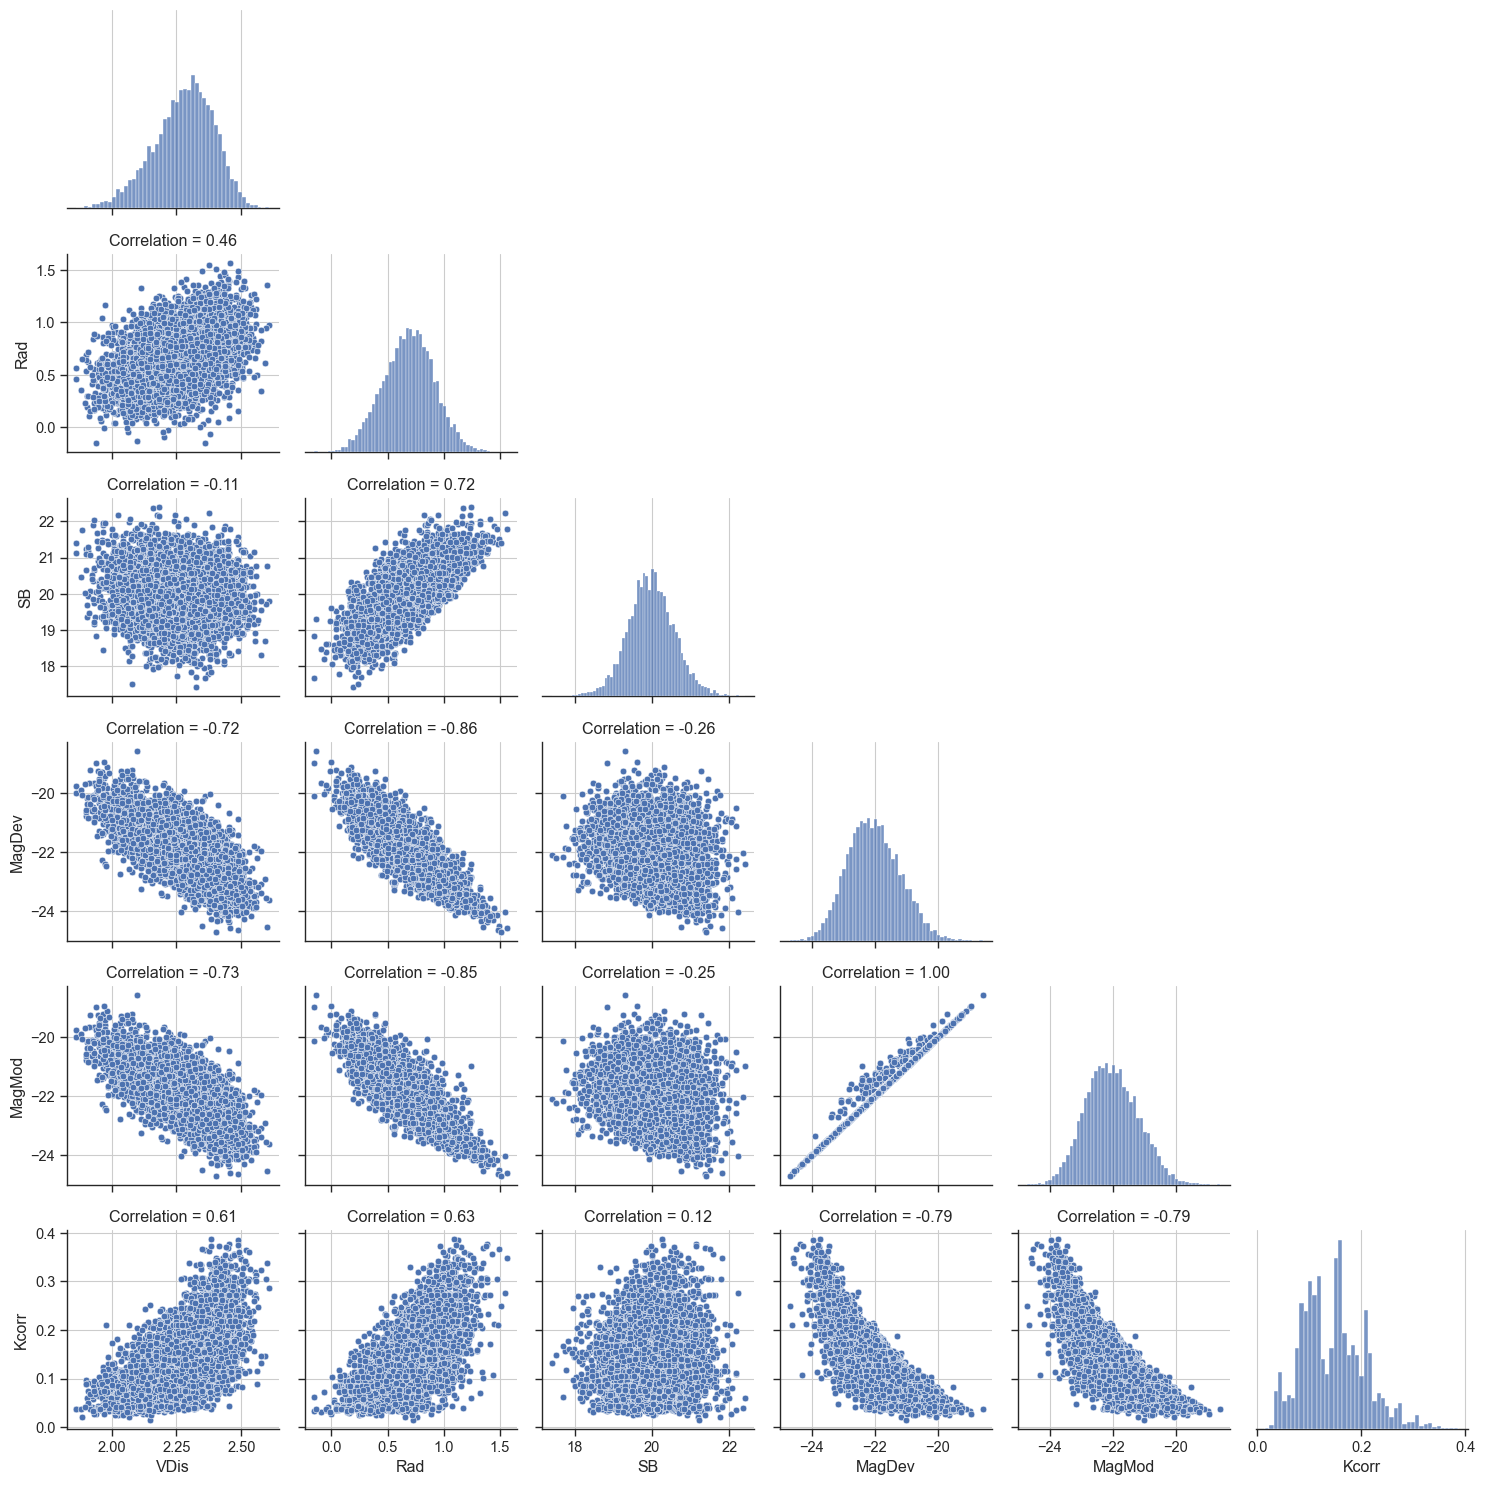

In [6]:
def corrfunc(x, y, ax=None, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
    ax.set_title(f'Correlation = {r:.2f}')

g = sns.pairplot(df, vars=physical_feats,corner=True)
g.map_lower(corrfunc)
plt.tight_layout()
plt.show()

# B. PCA

In [7]:
X = df.loc[:,physical_feats].to_numpy()
# Choose the relevant quantity values

#### (i) First, find how many PCA axes to use

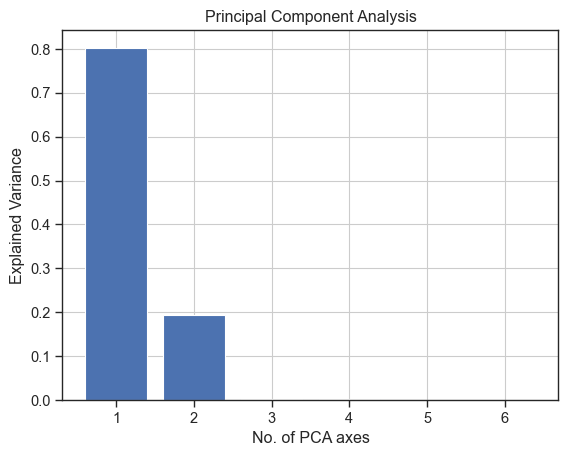

In [8]:
max_n = X.shape[1]

pca = PCA(n_components = max_n)
 
_ = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

plt.bar(x=np.arange(max_n)+1,height=explained_variance)
plt.title("Principal Component Analysis")
plt.xlabel("No. of PCA axes")
plt.ylabel("Explained Variance")
plt.show()

The first two axes capture ~99% of the variance, so we'll use only those two.

That is, choose $n_{\text{pca}} = 2 $.

In [9]:
n_pca = 2

pca = PCA(n_components = n_pca)
X_pca = pca.fit_transform(X)
percent_captured = (pca.explained_variance_ratio_.sum()*100/1)

print(f"Percentage of variance captured by {n_pca} dimensions = {percent_captured:.2f} %")

Percentage of variance captured by 2 dimensions = 99.53 %


In [10]:
df_pca = pd.DataFrame(data=X_pca,columns=["PCA Axis 1", "PCA Axis 2"])

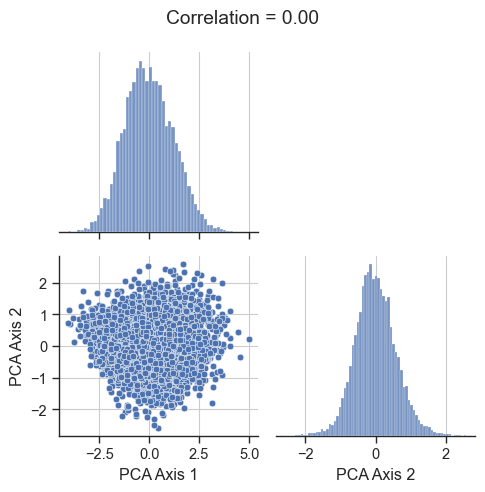

In [11]:
vars_interest = ["PCA Axis 1","PCA Axis 2"]
corr_val = df_pca.loc[:,vars_interest].corr().to_numpy()[0,1]

ax = sns.pairplot(df_pca,vars=vars_interest,corner=True)
plt.suptitle(f"Correlation = {corr_val:.2f}")
plt.tight_layout()
plt.show()

# C. Fundamental Plane

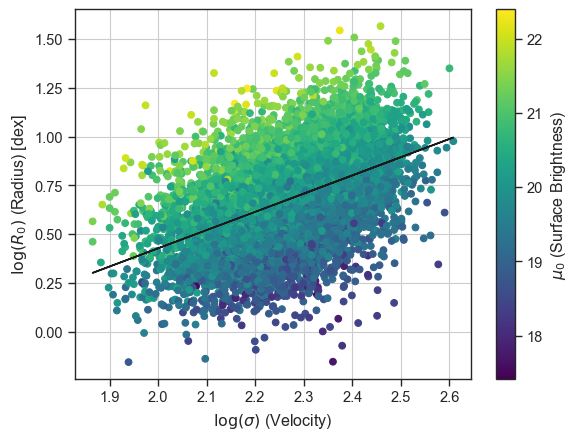

In [12]:
x_ax = df["VDis"]
y_ax = df["Rad"]
z_ax = df["SB"]

res_1 = stats.linregress(x_ax, y_ax)
plt.scatter(x_ax, y_ax, c = z_ax, cmap="viridis")

plt.xlabel(r"$\log (\sigma)$ (Velocity)") # X axis label
plt.ylabel(r"$\log (R_{0}) $ (Radius) [dex]") # Y axis label
plt.colorbar(label=r"$\mu_0$ (Surface Brightness)") # Z axis label aka colour

fit_vals = res_1.intercept + x_ax*res_1.slope

plt.plot(x_ax, fit_vals, 'k')
plt.show()

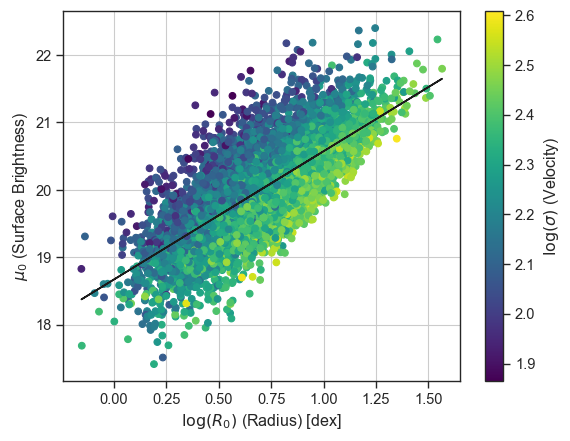

In [13]:
x_ax = df["Rad"]
y_ax = df["SB"]
z_ax = df["VDis"]

res_2 = stats.linregress(x_ax, y_ax)
plt.scatter(x_ax, y_ax, c = z_ax, cmap="viridis")

plt.xlabel(r"$\log (R_{0}) $ (Radius) [dex]") # X axis label
plt.ylabel(r"$\mu_0$ (Surface Brightness)") # Y axis label
plt.colorbar(label=r"$\log (\sigma)$ (Velocity)") # Z axis label aka colour

fit_vals = res_2.intercept + x_ax*res_2.slope

plt.plot(x_ax, fit_vals, 'k')
plt.show()

# D. Does No. of Neighbours affect galaxy properties?

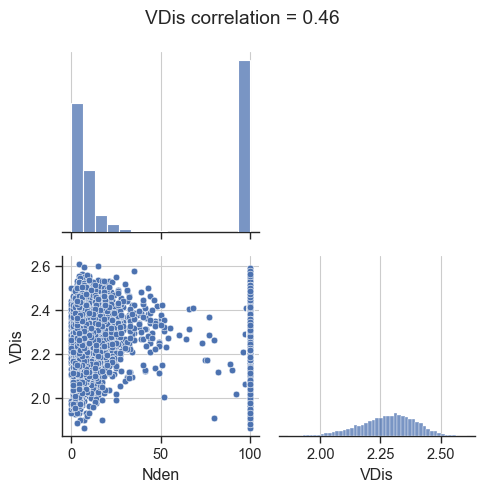

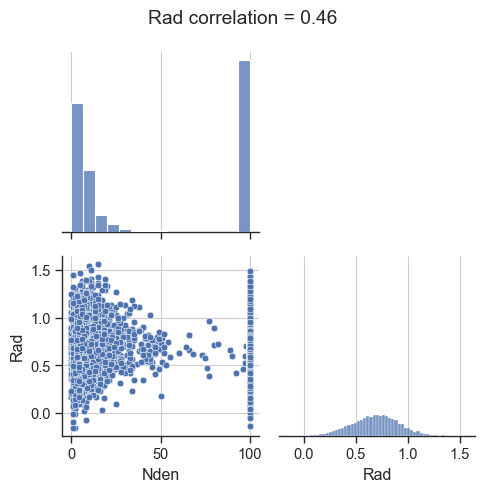

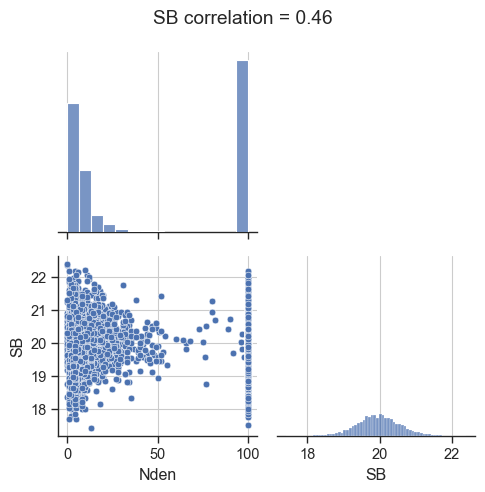

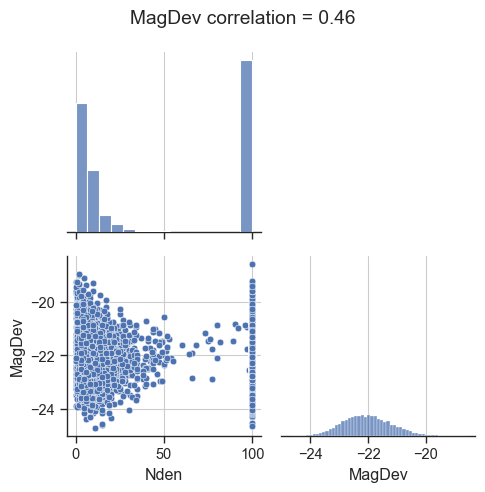

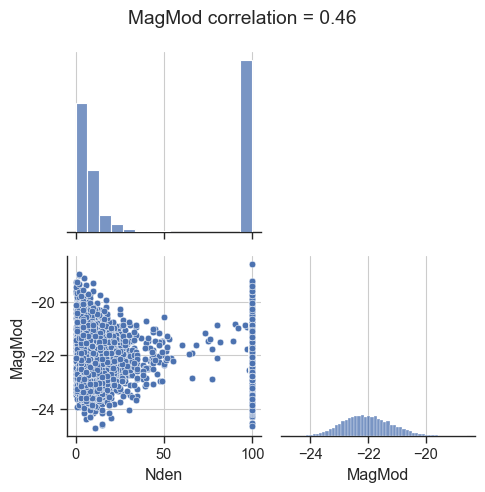

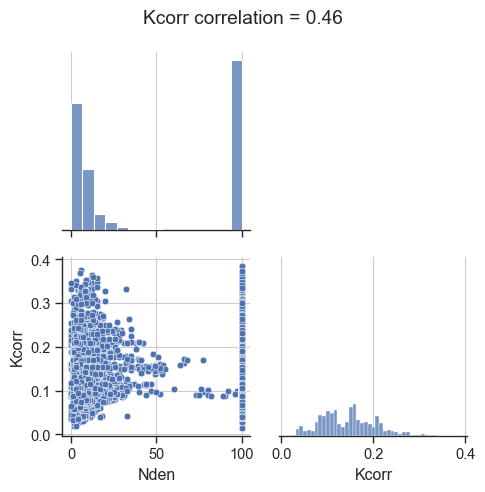

In [17]:
for feat in physical_feats:
    vars_interest = ["Nden",feat]
    corr_val = df.loc[:,physical_feats].corr().to_numpy()[0,1]
    ax = sns.pairplot(df,vars=vars_interest,corner=True)
    plt.suptitle(f"{feat} correlation = {corr_val:.2f}")
    plt.tight_layout()
    plt.show()

Note that all the 'physical' galactic features have a constant correlation with Nden (no. of near neighbours) = 0.46. 

This is peculiar - if we also look at the plots, between Nden=0 and Nden=50, there is a triangular shape that we observe, such that the properties tend to go towards mean value up till Nden=50. But then, the number of points between Nden=50 and Nden=100 decrease, followed by a sudden increase in the number of Nden=100 galaxies. These Nden=100 galaxies do not seem to be correlated with Nden, because, the authors binned all Nden>100 galaxies to Nden=100. This results in losing information. Thus, the partial correlation value (0.46) is because up till Nden<100, the data is sort of well correlated, but then stops being correlated at Nden=100.

# E. Later by paper on fundamental plane

In the followup paper by the authors (https://ui.adsabs.harvard.edu/abs/2003AJ....125.1866B/abstract), they split the dataset into bins/subsets based on Nden (no. of neighbours). They find that after doing this, and after they use proper Nden, there is a correlation between Nden and other galactic features. In their words,

```
"The fundamental plane shows that galaxies in dense regions are slightly different from galaxies in less dense regions."
```

# F. Dr. Hong's PCA Work

From my research in time-domain astronomy, I deal a lot with heteroskedastic data. This is because, the errors in magnitude/brightness are a function of the magnitude/brightness of the object itself. This is often because of seeing conditions, and image subtraction algorithms. This makes working with transient data very difficult, and lotsa of feature extraction methods do not consider this in-built heteroskedasticity. In my work on classification of transients, Dr. Hong's PCA work would absolutely be very useful, as it can be used to do dimensionality reduction by treating all distributions equally. This would be great for rapid transient detection and followup. But, there is a disadvantage of losing physical meaning when moving over to the PCA dimensions - I would love to talk to Dr. Hong and see what he would think about this!